In [12]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../src')) # or the path to your source code
sys.path.insert(0, module_path)
%pwd

'/home/windo/github/uos-drilling-wh/abyss/sandbox'

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from abyss.dataparser import loadSetitecXls
from abyss.uos_inference import DepthInference
%pwd

'/home/windo/github/uos-drilling-wh/abyss/sandbox'

In [2]:
def xls2df(file_path):
    raw = loadSetitecXls(file_path)
    df = raw[-1]
    df['Position (mm)'] = df['Position (mm)'].abs()
    return df

def analyse(file_path):
    analyser = DepthInference()
    kp = analyser.infer3_xls(file_path)
    return kp

def analyse_plot(file_path):
    file_path = Path(file_path)
    df = xls2df(file_path)
    analyser = DepthInference()
    kp = analyser.infer3_xls(file_path)
    sns.lineplot(data=df, x='Position (mm)', y='I Torque (A)')
    plt.ylabel('I Torque (A)')
    plt.xlabel('Position (mm)')
    plt.title(f'I Torque vs Position \n {file_path.stem}')
    plt.axvline(x=kp[0], color='r', linestyle='--', label='KP1')
    plt.axvline(x=kp[1], color='g', linestyle='--', label='KP2')
    plt.axvline(x=kp[2], color='b', linestyle='--', label='KP3')
    plt.legend()
    plt.grid()
    plt.show()
    return df

def analyse_plotly(file_path):
    file_path = Path(file_path)
    df = xls2df(file_path)
    analyser = DepthInference()
    kp = analyser.infer3_xls(file_path)
    fig = px.line(df, x='Position (mm)', y=['I Torque (A)', 'Step (nb)'], title=f'I Torque vs Position \n {file_path.stem}')
    fig.update_layout(xaxis_title='I Torque (A)', yaxis_title='Position (mm)')
    fig.show()
    return df

In [3]:
# Construct the absolute path to the file using module_path
# file_path = os.path.join(module_path, 'abyss/dev_data/17070141_17070141_ST_753_55.xls')
file_path = Path("/home/windo/github/uos-drilling-wh/abyss/src/abyss/dev_data") / "17070141_17070141_ST_753_55.xls"
# Load the file
raw = loadSetitecXls(file_path)
df = raw[-1]
df['Position (mm)'] = df['Position (mm)'].abs()

In [4]:
analyzer = DepthInference()
kp = analyzer.infer3_xls(file_path)
print(kp)

/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 66.11it/s]

(np.float32(4.569), np.float32(5.01), np.float64(18.488275003433227))


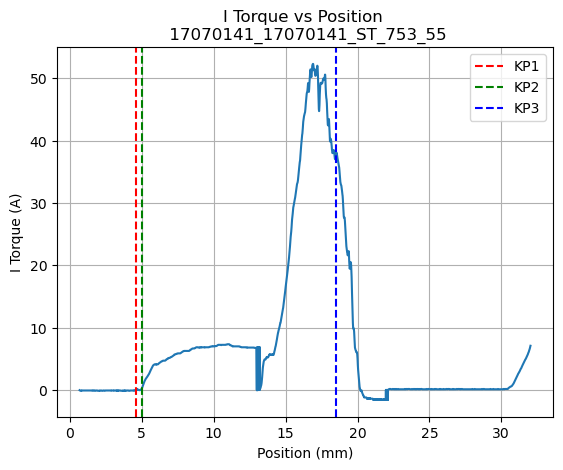

/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 73.83it/s]


,Position (mm),I Torque (A),I Thrust (A),I Torque Empty (A),I Thrust Empty (A),Step (nb),Stop code,Torque Power (W),Gap Length (mm)
0,0.673000,-0.049,-0.012,5.176,0.351,0.0,0.0,91.0,0.0
1,0.703000,-0.098,-0.012,5.176,0.351,0.0,0.0,93.0,0.0
2,0.734000,-0.146,-0.012,5.176,0.351,0.0,0.0,94.0,0.0
3,0.760000,-0.146,-0.023,5.176,0.351,0.0,0.0,97.0,0.0
4,0.791000,-0.098,-0.023,5.176,0.351,0.0,0.0,99.0,0.0
...,...,...,...,...,...,...,...,...,...
2034,32.006001,6.885,0.621,5.127,0.328,3.0,0.0,259.0,0.0
2035,32.028999,7.080,0.867,5.127,0.328,3.0,0.0,263.0,0.0
2036,32.028999,7.080,0.867,5.127,0.328,3.0,0.0,263.0,0.0
2037,32.028999,7.080,0.867,5.127,0.328,3.0,8.0,263.0,0.0


In [5]:
df = xls2df(file_path)
sns.lineplot(data=df, x='Position (mm)', y='I Torque (A)')
plt.ylabel('I Torque (A)')
plt.xlabel('Position (mm)')
plt.title(f'I Torque vs Position \n {file_path.stem}')
plt.axvline(x=kp[0], color='r', linestyle='--', label='KP1')
plt.axvline(x=kp[1], color='g', linestyle='--', label='KP2')
plt.axvline(x=kp[2], color='b', linestyle='--', label='KP3')
plt.legend()
plt.grid()
plt.show()

analyse_plotly("../test_data/MDB/17070141_17070141_ST_753_55.xls")


/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 122.95it/s]


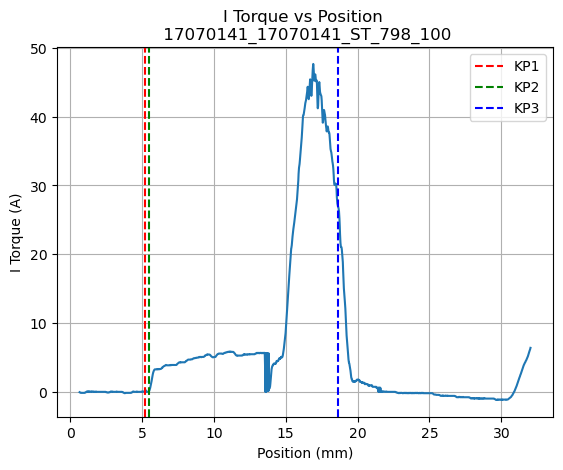

In [6]:
df = analyse_plot("../test_data/MDB/17070141_17070141_ST_798_100.xls")

/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 95.92it/s]


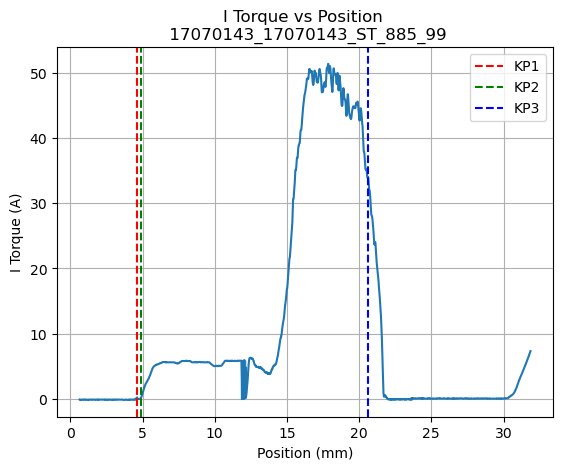

In [7]:
df = analyse_plot("../test_data/MDB/17070143_17070143_ST_885_99.xls")

In [8]:
%pwd

'/home/windo/github/uos-drilling-wh/abyss/sandbox'

/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 126.16it/s]


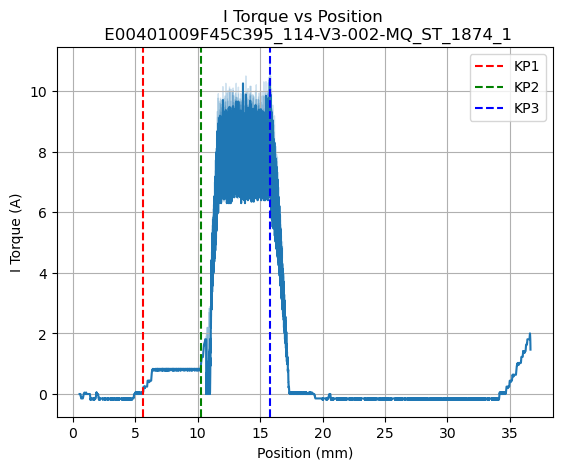

In [9]:
df = analyse_plot("../src/abyss/dev_data/mdb-mql-1/E00401009F45C395_114-V3-002-MQ_ST_1874_1.xls")


/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 80.34it/s] 


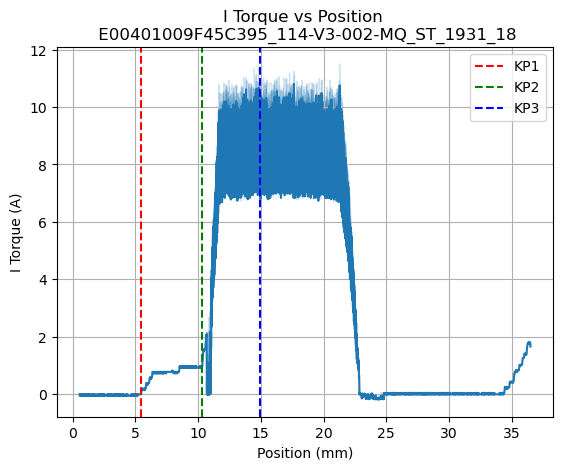

In [10]:
df = analyse_plot("../src/abyss/dev_data/mdb-mql-1/E00401009F45C395_114-V3-002-MQ_ST_1931_18.xls")

/home/windo/github/uos-drilling-wh/abyss/src/abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:00<00:00, 84.74it/s] 


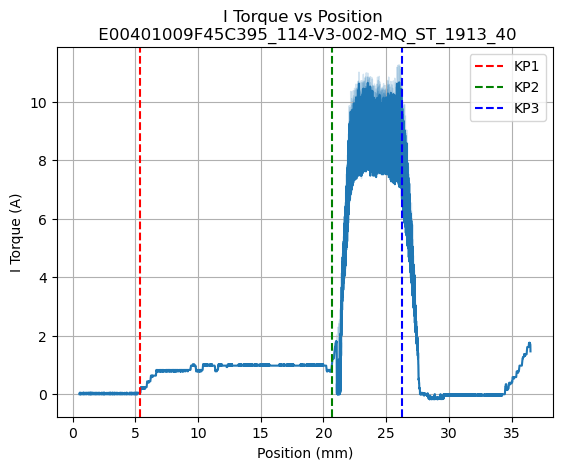

In [11]:
df = analyse_plot("../src/abyss/dev_data/mdb-mql-1/E00401009F45C395_114-V3-002-MQ_ST_1913_40.xls")